In [4]:
# Linear Algebra
# Project 2: Cramer's Rule. How fast is it?

# Collaborators (in chronological order from discussion board):

# Holly Hammons: Developed the first prototype of the code using a fixed 2x2 matrix to understand the process.

# Connor Denney: Discovered use of .copy() function to copy a matrix, allowing manipulation of it without affect the original matrix.
# Also edited Holly's initial program so that it will work for an arbitrary sized matrix.

# Jaden Adams: Utilized np.random.randint() function to allow creation of a randomly generated matrix of any size. Also discovered
# correct way to utilize slice operations and indexing for replacing columns of a matrix.

# Everett Oklar: First to attempt the looping of the code to allow muliple matrices to be solved, also attempted the use of seperate
# functions for solving Cramer's Rule and calculating time.

# Gabbi Chrysler: The resident expert on the concept of complexity in programs.

# Alex Langfield: First to implement a graphical representation of the data, served as the final basis for the code.

# Brett Webb: Added loop to replace every column in A with matrix B to calculate Cramer's Rule. Also added graphical repreresentation
# of the data.

# Sophia Wyss: Made alterations to graph output to make it look neater. Also tested the final code on her own machine to determine
# accuracy of results.

# Stacy Barbarick: Performed a rough data analysis of the output of the code with very promising results.

# Other Contributors: Nick Vail, Adam Forland

In [5]:
import matplotlib.pyplot as plt  # Allows us to plot our results
import numpy as np
import time  # Allows access to the system clock so we can time the process

36.4181387424469 seconds


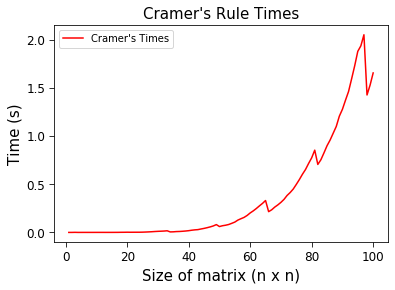

In [8]:
t1 = time.time()  # Only used to see the total time the whole program takes
S = 100  # Maximum matrix size
cramersTimesList = []  # Empty list to store the time values in
sizeList = []  # Empty list to store the sizes of the matrices
# Used lists to keep track of the values because it was easier to append to an empty list than an empty array.  These will
# be converted to arrays later for plotting


for size in range(1,S+1):  # Start at 1 because we need to have the first matrix be of size 1, can't have one of size 0
    detA = 0  # Looping parameter
    while detA == 0:  # This will ensure the determinant does not equal zero, ensuring linear independance 
        
        # Create an array (matrix) of random integers, min value is 0 by default, max value is set to 10 but can be changed
        A = np.random.randint(10, size = [size,size])
        detA = np.linalg.det(A)  # Find determinant of A
       
        # This is just in case so to not cause a divide by 0 error in the loop below. This skips the rest of this iteration and tries again,
        # (i. e. Creates a new matrix of the same size, making sure it is invertible)
        if detA == 0:  
            continue

        detAi = 0  # Looping parameter
        while detAi == 0:  # Same case as the above while loop, we want invertible matrices
            timeStart = time.time()  # Start time
            
            B = np.random.randint(10, size = [size])  # Generate a random B matrix to replace the columns of A with
            # It is created here so that if, by replacing a column of A, makes detA = 0, it will generate a new B matrix and try again
            
            for i in range(size):
                Ai = np.copy(A)  # Copy the A matrix to a new matrix in order to change the columns without changing A itself
                Ai[:, i] = B  # Replace column i of Ai (a copy of A) with B
                detA = np.linalg.det(A)  # Compute detA again to capture full time that it takes to solve for xi using Cramer's Rule
                detAi = np.linalg.det(Ai)  # Compute determinant of Ai
                xi = np.divide(detAi, detA)  # Cramer's Rule, divide the two determinants to obtain a unique solution
            timeEnd = time.time()  # End time
            timeCramers = timeEnd - timeStart  # Find total time it took to compute Cramer's Rule
        
    # These are added once an invertible A was created (i.e. detA != 0), and every matrix that was created by replacing each column
    # with B was also invertible
    sizeList.append(size)  # Add size to the size list, creates a list from 1 to S
    cramersTimesList.append(timeCramers)  # Add the time it took for Cramer's Rule to be computed to the list
    
# Convert our time and size lists to arrays in order to plot them. pyplot expects arrays as inputs
sizes = np.array(sizeList)
cramersTimes = np.array(cramersTimesList)

t2 = time.time()  # The total time the program takes to run
print(t2 - t1, "seconds")

# Plot the results
plt.plot(sizes, cramersTimes, 'r', label='Cramer\'s Times') 
plt.xlabel('Size of matrix (n x n)', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.title("Cramer's Rule Times", fontsize=15)
plt.legend()
plt.ticklabel_format(axis='y', scilimits=(0,0))  # Makes y-axis use scientific notation
plt.tick_params(labelsize=12, length=5, colors='black')
plt.show()